# train data

In [ ]:
# # Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
# urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

# df_train = pd.read_table("ratings_train.txt")

# df_train.info()

# # 1. Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
# print(df_train['document'].nunique())
# df_train = df_train.drop_duplicates(subset=['document'])
# df_train.nunique()

# # Í∏ç, Î∂ÄÏ†ï Î†àÏù¥Î∏î ÎπÑÏú® ÌôïÏù∏
# df_train['label'].value_counts().plot(kind='bar')
# plt.show()

# df_train = df_train.dropna(how='any')
# df_train.isnull().values.sum() # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóêÏÑú NaNÏù¥ ÌïòÎÇòÎèÑ ÏóÜÏùå

# # Ï†ïÍ∑úÏãùÏùÑ ÌôúÏö©Ìï¥ÏÑú ÌïúÍ∏Ä, Í≥µÎ∞± ÌïúÏπ∏Îßå ÎÇ®Í∏∞Í≥† Îã§ Ï†úÍ±∞
# import re

# # replace Ï†ïÍ∑úÏãùÏù¥ ÏòõÎÇ†Ïù¥Îûë Îã¨Î¶¨ÏßÑÍ±∞ Í∞ôÏùå..
# # df_train['document'] = df_train['document'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]", "")
# df_train['document'] = df_train['document'].apply(lambda x : re.sub("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]", "", x))

# df_train.head()

# # Ï†ïÍ∑úÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÌïúÍ∏ÄÎßå ÎÇ®ÍπÄ
# #   - ÌïúÍ∏Ä, Í≥µÎ∞±ÎπºÍ≥† Îã§ ÏßÄÏõ†Í∏∞ ÎïåÎ¨∏Ïóê ÏòÅÏñ¥ÎÇò ÌäπÏàò Í∏∞Ìò∏Î°úÎßå Ïù¥Î£®Ïñ¥ÏßÑ Î¶¨Î∑∞ÏóêÎäî ÏïÑÎ¨¥Í≤ÉÎèÑ ÎÇ®ÏßÄ ÏïäÏùå
# #   -> '' Í∞íÏù¥ Îê®.
# #   ex) GDANDTOPINTHECLASS -> ''
# df_train.loc[df_train['document'] == '', 'document'].value_counts()

# # ÏïÑÎ¨¥Í≤ÉÎèÑ Îì§Ïñ¥ÏûàÏßÄ ÏïäÏùÄ ÎÇ¥Ïö©ÏùÑ Í∞ïÏ†úÎ°ú nanÏúºÎ°ú ÏπòÌôò
# df_train['document'].replace('', np.nan, inplace=True)
# df_train = df_train.dropna(how='any')
# df_train.info()

# from tqdm import tqdm_notebook
# from konlpy.tag import Okt

# okt = Okt()
# X_train = []

# for sentence in tqdm_notebook(df_train['document']):

#   # ÌòïÌÉúÏÜå Î∂ÑÎ¶¨ Î∞è Ï†ïÍ∑úÌôî, Ïñ¥Í∞Ñ Ï∂îÏ∂ú
#   temp_X = okt.morphs(sentence, stem=True, norm=True) # ÎÇòÎäî Î∞îÎ≥¥Îã§ -> [ÎÇòÎäî, Î∞îÎ≥¥Îã§]
#   X_train.append(temp_X)

#   # 6. y_train Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# y_train = df_train['label'].tolist()

# # 7. Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
# with open("X_train.pkl", "wb") as f:
#     pickle.dump(X_train, f)

# with open("y_train.pkl", "wb") as f:
#     pickle.dump(y_train, f)

# print("X_train.pkl Î∞è y_train.pkl ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!")

# test data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!pip install konlpy

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 54.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 27.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pickle
from tqdm.notebook import tqdm
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
# ÌõàÎ†®Îêú Î™®Îç∏ Î∞è TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä Î∂àÎü¨Ïò§Í∏∞
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

In [ ]:
# TF-IDF Î≤°ÌÑ∞ÎùºÏù¥Ï†Ä Î°úÎìú
tfidf_vectorizer = TfidfVectorizer()
X_train = [' '.join(words) for words in X_train]  # Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò

In [ ]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ Î°úÎìú
log_reg = LogisticRegression(max_iter=100000).fit(X_train_tfidf, y_train)

In [ ]:
import numpy as np

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
df_test = pd.read_csv("/content/kakao_map_place_comment_final.csv", encoding='utf-8-sig')  # ÌååÏùº Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî
df_test.drop_duplicates(subset=['contents'], inplace=True)
df_test['contents'] = df_test['contents'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]", "", regex=True).str.strip()
df_test['contents'].replace('', np.nan, inplace=True)
df_test.dropna(subset=['contents'], inplace=True)

<ipython-input-11-bfb92f787972>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['contents'].replace('', np.nan, inplace=True)


In [ ]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ ÏÑ§Ï†ï
okt = Okt()
X_test = []

# ÌòïÌÉúÏÜå Î∂ÑÏÑù (ÌÜ†ÌÅ∞Ìôî ÌõÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò)
for sentence in tqdm(df_test['contents']):
    temp_X = okt.morphs(sentence, stem=True, norm=True)  # ÌòïÌÉúÏÜå Î∂ÑÏÑù
    X_test.append(' '.join(temp_X))  # Î¶¨Ïä§Ìä∏Î•º Îã§Ïãú Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ Ï†ÄÏû•

  0%|          | 0/48353 [00:00<?, ?it/s]

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞êÏ†ï Î∂ÑÏÑù Î∞è ÎùºÎ≤® ÏòàÏ∏°
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # TF-IDF Î≥ÄÌôò
predicted_labels = log_reg.predict(X_test_tfidf)  # Í∞êÏ†ï ÏòàÏ∏°

In [ ]:
# ÏòàÏ∏°Îêú Í∞êÏ†ï ÎùºÎ≤®ÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_test['label'] = predicted_labels

In [ ]:
# Í≤∞Í≥º ÌôïÏù∏ Î∞è CSV Ï†ÄÏû•
print(df_test[['contents', 'label']].head(10))  # ÏÉÅÏúÑ 5Í∞ú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
df_test.to_csv("labeled_test_data.csv", encoding='utf-8-sig', index=False)  # Í≤∞Í≥º Ï†ÄÏû•

                                            contents  label
0  ÏôÄ ÎåÄÎ∞ï Î®πÏùÑÎåÄ ÏóÜÏñ¥ÏÑú ÏïÑÎ¨¥ Í∏∞ÎåÄÏóÜÏù¥ Îì§Ïñ¥Í∞ôÎäîÎåÄ ÏßÑÏßú ÏôÑÏ†Ñ ÎßõÏûàÏñ¥ÏöîÏÇ¨ÏßÑ Ï∞çÏùÑ ÏÉùÍ∞ÅÎèÑ...      1
1                                                ÎßàÏù¥Ï™ô      0
2             Í∞ÄÏÑ±ÎπÑ Ï¢ãÏùåÏÑ∏Ìä∏Î©îÎâ¥ÎèÑ Íµ¨ÏÑ± Ï¢ãÏùåÍ∞ÑÏßúÏû•ÏùÑ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏûêÏ£º Î®πÏúºÎü¨ Í∞ÄÍ≤å Îê®      1
3  Í∞ÄÏßÄÎßàÏÖà „Öã„Öã„Öã  ÌîÑÎ†åÏ∞®Ïù¥Ï∏†ÏóêÏÑú ÌîÑÎ†åÏ∞®Ïù¥Ï¶à Î©îÎâ¥Í∞Ä ÏïàÎêòÎäîÍ±¥ Îòê Ï≤òÏùåÎ≥¥ÎÑ§ „Öã„Öã„Öã„Öã„Öã ...      0
4  ÏΩúÎùº Î¶¨ÌïÑ ÏïàÎê®Í∞êÌäÄ ÏãùÏñ¥ÏûàÏùåÎÉÖÌÇ® ÎàÑÍµ¨ Ï£ºÍ∏∞ÎèÑ Î∂ÄÎÅÑÎü¨Ïö∏ ÎßåÌÅº Ï§åÏù¥Î≤§Ìä∏ ÌïúÎã§ Ïç®ÎÜìÍ≥† Îßâ...      0
5               ÏπúÏ†àÌïòÍ≥† Îã§ Ï¢ãÍ∏¥ÌïúÎç∞ Ïó¨Îü¨Î≤à Î®πÏñ¥Î≥∏ Í≤∞Í≥º ÏÜåÏä§ Ìè¨Ìï®Ìï¥ÏÑú ÏñëÏù¥ Ï†ÅÏùå      1
6  Î∞îÎ°úÎ∞îÎ°ú Ï°∞Î¶¨ÎßòÌÑ∞ ÏõêÏπôÏù¥ÏßÄÎßå ÏãùÏñ¥ÏûàÎäî Í∞êÌäÄ Ï£ºÎäî Í≥≥ÎèÑ Î¥ÑÌë∏ÏßêÌïú ÏÜç Ïû¨Î£åÍ∞ÄÎÅî ÎÑàÍ≤üÎèÑ ...      0
7  Ïó¨ÌÉú Ïù¥Îü∞ ÎßõÏßëÏùÑ Í≥ÅÏóê ÎëêÍ≥† Î™∞ÎûêÎã§Îäî ÏÇ¨Ïã§Ïóê Ï∂©Í≤© Î∞õÏïòÏäµÎãàÎã§ ÏßÑÏßú Ï†úÏú°ÏùÄ Í∞ÄÏÑ±ÎπÑÎäî .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÏßÄÏó≠Î≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÑ§Ï†ï
gentrified_regions = ['ÎåÄÌïôÎ°ú', 'Î∂ÅÏ¥å', 'ÏÑúÏ¥å', 'ÌôçÎåÄÏûÖÍµ¨Ïó≠', 'Ìï©Ï†ï', 'Ïó∞ÎÇ®', 'Ìï¥Î∞©Ï¥å', 'Í≤ΩÎ¶¨Îã®Í∏∏',
                       'Ï¢ÖÎ°ú3Í∞Ä', 'ÏÑ±ÏàòÎèô', 'Ïã†ÏÇ¨Îèô Í∞ÄÎ°úÏàòÍ∏∏', 'ÏÜ°Î¶¨Îã®Í∏∏', 'Î™ÖÎèô', 'Ïã†Î¶º', 'Î¨∏Îûò',
                       'Ïù¥ÏàòÏó≠', 'Ïö©Î¶¨Îã®Í∏∏']
non_gentrified_regions = ['Í∞ïÎÇ®Ïó≠', 'ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§', 'Í±¥ÎåÄÏûÖÍµ¨Ïó≠', 'Ïó¨ÏùòÎèÑÏó≠', 'ÎèôÎåÄÎ¨∏', 'Ïû†Ïã§Ïó≠',
                          'ÌöåÍ∏∞Ïó≠', 'ÏòÅÎì±Ìè¨', 'Ï≤≠Îã¥', 'ÏÇ¨Îãπ']
baseline_regions = ['ÏÑ±ÎÇ¥Îèô', 'ÏãúÌù•Îèô', 'ÏÇºÏñëÎèô', 'Ï§ëÌôîÎèô', 'ÏõîÍ≥ÑÎèô', 'ÏùëÏïîÎèô', 'Ïã†ÎèÑÎ¶ºÎèô',
                    'Ïã†Ï†ïÎèô', 'ÎèÑÎ¥âÎèô', 'Î∞©ÌôîÎèô']

# ÏßÄÏó≠ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÎ•ò
def categorize_region(region):
    if region in gentrified_regions:
        return 'Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò'
    elif region in non_gentrified_regions:
        return 'ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò'
    elif region in baseline_regions:
        return 'Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ'
    else:
        return 'Í∏∞ÌÉÄ'

# df_testÏóê ÏßÄÏó≠Î≥Ñ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∂îÍ∞Ä
df_test['category'] = df_test['region'].apply(categorize_region)

# 'Í∏∞ÌÉÄ' ÏßÄÏó≠ Ï†úÏô∏
df_test = df_test[df_test['category'] != 'Í∏∞ÌÉÄ']

In [ ]:
df_test

commentid                                           contents  point  \
0       11548111  ÏôÄ ÎåÄÎ∞ï Î®πÏùÑÎåÄ ÏóÜÏñ¥ÏÑú ÏïÑÎ¨¥ Í∏∞ÎåÄÏóÜÏù¥ Îì§Ïñ¥Í∞ôÎäîÎåÄ ÏßÑÏßú ÏôÑÏ†Ñ ÎßõÏûàÏñ¥ÏöîÏÇ¨ÏßÑ Ï∞çÏùÑ ÏÉùÍ∞ÅÎèÑ...      5   
1        9102935                                                ÎßàÏù¥Ï™ô      5   
2        6983114             Í∞ÄÏÑ±ÎπÑ Ï¢ãÏùåÏÑ∏Ìä∏Î©îÎâ¥ÎèÑ Íµ¨ÏÑ± Ï¢ãÏùåÍ∞ÑÏßúÏû•ÏùÑ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏûêÏ£º Î®πÏúºÎü¨ Í∞ÄÍ≤å Îê®      4   
3        7793189  Í∞ÄÏßÄÎßàÏÖà „Öã„Öã„Öã  ÌîÑÎ†åÏ∞®Ïù¥Ï∏†ÏóêÏÑú ÌîÑÎ†åÏ∞®Ïù¥Ï¶à Î©îÎâ¥Í∞Ä ÏïàÎêòÎäîÍ±¥ Îòê Ï≤òÏùåÎ≥¥ÎÑ§ „Öã„Öã„Öã„Öã„Öã ...      1   
4        6983091  ÏΩúÎùº Î¶¨ÌïÑ ÏïàÎê®Í∞êÌäÄ ÏãùÏñ¥ÏûàÏùåÎÉÖÌÇ® ÎàÑÍµ¨ Ï£ºÍ∏∞ÎèÑ Î∂ÄÎÅÑÎü¨Ïö∏ ÎßåÌÅº Ï§åÏù¥Î≤§Ìä∏ ÌïúÎã§ Ïç®ÎÜìÍ≥† Îßâ...      1   
...          ...                                                ...    ...   
62031   11619581                                        ÏÉùÍ∞ÅÎ≥¥Îã§ Ïû¨ÎØ∏ÏûàÏóàÏñ¥Ïöî      4   
62032   11619455  Ï£ºÏ∞® ÏãúÍ∞Ñ Î¨¥Î£åÏù∏Îç∞ ÎÜÄÎã§Î≥¥Î©¥ ÏãúÍ∞ÑÏù¥ ÌõÖ Í∞ÄÏöî „Öé„Öé ÏûÖÏû•Î∂ÄÌÑ∞ Ï†ïÎßê Í∏∞Ï°¥Ïùò Ï≤¥ÌóòÎÜÄÏù¥ÏôÄ ...      5   
62033   11600455                        Ïú†ÏπòÏõêÏπúÍµ¨ Í∞ÄÏ°±Í≥º ÏôîÏñ¥ÏöîÏïÑÏù¥Îì§ÎèÑ ÏóÑÎßàÎì§ÎèÑ Ïã†ÎÇòÌï¥Ïöî      5   
62034   11473512                         ÏïÑÏù¥Í∞Ä Ï¢ãÏïÑÌïòÎÑ§Ïöî ÎçîÌÅ¨Í∏∞Ï†ÑÏóê Îòê Î∞©Î¨∏Ìï¥Î≥¥Î†§Ìï©ÎãàÎã§      5   
62035   11393697                         ÏïÑÏù¥Îì§Ïù¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÌñàÏäµÎãàÎã§Îòê Í∞ÄÍ≥† Ïã∂Îã§Í≥† ÌïòÎÑ§Ïöî      5   

             username                                            profile  \
0           kallismar  http://k.kakaocdn.net/dn/kQ21M/btqwExAC1CO/fWC...   
1                 ÍπÄÎØºÏÑù  http://k.kakaocdn.net/dn/luL8e/btrgdFU6i8p/Wbt...   
2               quaso  http://t1.daumcdn.net/local/kakaomapPhoto/prof...   
3                  Ï≠àÎÑµ  http://t1.daumcdn.net/local/kakaomapPhoto/prof...   
4               quaso  http://t1.daumcdn.net/local/kakaomapPhoto/prof...   
...               ...                                                ...   
62031             Ï†ïÏßÄÌòÑ  http://k.kakaocdn.net/dn/cybOrG/btqyuESq9z4/0W...   
62032              Ï†ïÎØ∏  http://k.kakaocdn.net/dn/bpftE5/btsKMhJavWl/vJ...   
62033  "hannah kangüíñ"  http://t1.daumcdn.net/local/kakaomapPhoto/prof...   
62034             ÍπÄÏßÑÏàô  http://k.kakaocdn.net/dn/pWOrW/btsH1L6CBCJ/yFo...   
62035          isyyjy  http://k.kakaocdn.net/dn/BPRWO/btqx0rEbrT4/zrN...   

      profileStatus  photoCnt  likeCnt  \
0                 S         1        1   
1                 S         0        0   
2                 S         0        0   
3                 S         0        0   
4                 S         0        0   
...             ...       ...      ...   
62031             S         0        0   
62032             S         3        0   
62033             S         1        0   
62034             S         0        1   
62035             S         0        0   

                                               thumbnail  kakaoMapUserId  ...  \
0      http://t1.daumcdn.net/local/kakaomapPhoto/revi...      1122874090  ...   
1                                                    NaN      1929390282  ...   
2                                                    NaN      1150558037  ...   
3                                                    NaN       756168138  ...   
4                                                    NaN      1150558037  ...   
...                                                  ...             ...  ...   
62031                                                NaN      1959840417  ...   
62032  https://t1.daumcdn.net/local/booking/review/E5...      3834338965  ...   
62033  https://t1.daumcdn.net/local/booking/review/0F...      1798942373  ...   
62034                                                NaN      3529141901  ...   
62035                                                NaN      1161430151  ...   

                                 level         date   isMy  isBlock  \
0      {'nowLevel': 32, 'badge': '03'}  2024.12.02.  False    False   
1       {'

In [ ]:
df_price_gen = df_test[df_test['category'] == 'Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò'][['contents', 'label']]
df_price_gen[df_price_gen['contents'].str.contains('Í∞ÄÍ≤©', na=False)]['label'].value_counts()

label
0    1091
1     894
Name: count, dtype: int64

In [ ]:
df_price_gen[df_price_gen['contents'].str.contains('Í∞ÄÍ≤©', na=False)].head(30)

contents  label
31   Î∂ÄÏ∂îÏ†Ñ ÍπÄÏπòÏ∞ú Î®πÎäîÎç∞ ÎßõÏûàÍ∏¥ Ìï®Îã§Îßå Í∞ÄÍ≤©ÎåÄ ÏûàÍ≥† ÌÖåÏù¥Î∏î Í∞ÑÍ≤© Ï¢ÅÏïÑÏÑú ÏóÑÏ≤≠ ÏãúÎÅÑÎü¨Ïõå ...      0
55   Î≥¥Ïåà Î®πÏóàÎäîÎç∞ Ïù¥ Îèà Ï£ºÍ≥† Ïù¥Í±∞ Î®πÏúºÎ†§Í≥† ÏôîÎÇò ÏÉùÍ∞ÅÎßå Îì§ÏóàÎã§ ÎÑàÎ¨¥ Ïñ¥Ïù¥ÏóÜÎäî ÏñëÍ≥º Í∞Ä...      0
57   Ïù¥Î†áÍ≤å Î∂àÏπúÏ†àÌï†ÏàòÍ∞ÄÍ∑∏ÎüºÏóêÎèÑ ÏùåÏãùÏù¥ÎùºÎèÑ ÎßõÏûàÏúºÎ©¥ Îã§ Ïª§Î≤ÑÎê†ÌÖêÎç∞ ÏùåÏãùÎèÑ Îî∞ÎìØÌïòÏßÄÎèÑ ÏïäÍ≥†...      0
101                         ÎßõÏóÜÏßÑ ÏïäÎäîÎç∞ Í∞ÄÍ≤©ÎåÄÎπÑÍ∑∏Îã•Îã§Í∑∏Îã•Í±ç Îã§Î•∏Îç∞ Í∞ÄÏÑ∏Ïöî      0
102  Î¶¨Î∑∞ Ïûò ÏïàÎÇ®Í∏∞ÎäîÎç∞ ÎÑàÎ¨¥ Í∏∞Î∂ÑÎÇòÏÅòÍ≥† Î≥ÑÎ°úÏòÄÏñ¥ÏÑú ÎÇ®ÍπÅÎãàÎã§ÍπÄÏπòÏ∞úÏùÑ ÏãúÏº∞ÏùÑ Îïå ÍπÄÏπòÏ∞úÏóê ...      0
106  Î≥¥Ïåà ÏÜåÏôÄ Îß§Ïö¥ÎèºÏßÄÍ∞àÎπÑÏ∞ú ÏãúÏº∞Ïñ¥ÏöîÎ≥¥ÏåàÏùÄ ÎÑàÎ¨¥ ÎªëÎªëÌï¥ÏÑú ÎÇ®Í≤ºÍ≥† Í∞ÄÍ≤©ÎåÄÎπÑ ÏñëÎèÑ ÎßéÏù¥ Ï†Å...      1
110  ÏùåÏãùÏù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Îã§ÏßúÍ≥†Ï£ºÎ¨∏Ï†ÑÏóê ÏñëÏùÑ ÏûòÎ™∞Îùº ÎëêÎ™ÖÏù¥ÏÑú Î©îÏù∏Î©îÎâ¥ ÎëêÍ∞úÏãúÌÇ§Î©¥ ÎßéÏùÑÍπåÌïòÏó¨...      0
122  Í∞ÄÍ≤©ÏùÄ Ï∞©ÌïúÌé∏ÏûÑ ÏàòÏú°ÏùÄ Î®πÏùÑÎßåÌï® ÍπÄÏπòÏ∞úÏùÄ Ï¢Ä Îã®ÎßõÏù¥ Í∞ïÌï® ÌååÏ†ÑÏùÄ ÌäπÏù¥ÌïòÍ≤å ÎåÄÌååÎ•º Ïç®...      0
166              ÎßõÏùÄ Í∑∏Îü≠Ï†ÄÎü≠ ÌèâÎ≤îÌïúÎç∞ ÏñëÏóê ÎπÑÌï¥ Í∞ÄÍ≤©Ïù¥ ÏãúÏºúÎ≥¥ÏãúÎ©¥ Ïù¥Ìï¥ ÎêòÏã§Í≤ÅÎãàÎã§      0
222  Í∞ÑÎèÑ Îî± Ï¢ãÍ≥† ÏàúÎëêÎ∂Ä Ï†ïÎßê Î∂ÄÎìúÎü¨ÏõåÏÑú Ï¢ãÏïòÏñ¥Ïöî Ìï¥Î¨ºÏàúÎëêÎ∂ÄÏóê Ìï¥Î¨ºÏù¥ Ïñ¥ÎßàÏñ¥ÎßàÌïòÍ≤å Îì§Ïñ¥...      1
228  Í∞ÄÏ°±ÏãùÏÇ¨Î°úÎ∞©Î¨∏ÌñàÏäµÎãàÎã§ Îß§Ïû•ÎèÑÍπîÎÅîÌïòÍ≥† Í∞ÄÍ≤©ÎåÄÎèÑ Ìï©Î¶¨Ï†ÅÏù¥Îùº Ìé∏ÌûàÎ®πÏùÑÏàòÏûàÏóàÏñ¥Ïöî  Î∞ëÎ∞òÏ∞¨ÎèÑ...      1
230  Ï∂îÏö¥ÎÇ†  Îì†Îì†ÌûàÎ®πÍ∏∞ÏóêÎèÑ Ï¢ãÍ≥† Í∞ÄÍ≤©ÎåÄÎèÑÏ¢ãÏïÑÏÑú Î∂ÄÎã¥ÏóÜÏù¥ Î®πÏùÑÏàòÎèÑ ÏûàÏñ¥ÏÑú Í∞ÑÎã®ÌïòÎ©¥ÏÑú Îì†Îì†...      1
250  ÎßõÍ≥º Í∞ÄÍ≤© Ï†ÑÎ∂ÄÎã§ ÏπúÏ†àÌïòÍ≥† Ï¢ãÏïÑÏöî ÌäπÌûà ÏàúÎëêÎ∂ÄÏ∞åÍ∞úÏóê Î∞• ÎßêÏïÑÎ®πÎäîÎç∞ Í∑∏Í±∞ Ïù¥Í∏∞Îäî Îß§Îâ¥...      1
262  ÎëêÎ∂Ä ÏßÑÏßú Ï¢ãÏïÑÌïòÎäîÎç∞ Ïó¨Í∏¥ ÎëêÎ∂ÄÎ°ú ÎßåÎìúÎäî ÏöîÎ¶¨Í∞Ä ÎßéÏïÑÏÑú Ï¢ãÏïÑÏöî Í∞ÄÍ≤©ÎåÄÎπÑ Ïñë ÎßéÏïÑÏÑú ...      1
301  ÏãúÏ≤≠Í∞à ÏùºÏù¥ ÏÉùÍ∏∞Î©¥ Í∞ÄÎÅî ÌòºÎ∞•ÏùÑ Ìï¥Ïïº ÌïòÎäîÎç∞ Î≠ò Î®πÏñ¥Ïïº ÌïòÎÇò Îß§Î≤à Í≥†ÎØºÏù¥ÏóàÏñ¥Ïöî„Ö†ÏßÅÏû•...      1
311  Î∂ÅÏ¥å ÏàúÎëêÎ∂Ä ÏßÑÏßú ÎßõÏûàÏñ¥Ïöî Í∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÎëêÎ∂ÄÍ∞Ä Í≥†ÏÜåÌïòÎ©¥ÏÑúÎèÑ Îã¥Î∞±Ìï¥ÏÑú ÏßÑÏßú ÎßõÎèåÏù¥...      1
325         Î∂ÅÏ¥åÏàúÎëêÎ∂Ä Í∞ÄÍ≤©ÎèÑ Ï†ÄÎ†¥ÌïòÍ≥† ÌïúÎÅºÎ®πÍ∏∞ ÎÑàÎ¨¥ Ï¢ãÏäµÎãàÎã§ ÎßõÏûàÍ≥† Î®πÍ≥†ÎÇòÏÑúÎèÑ ÍπîÎÅîÌï¥Ïöî      1
330  ÏöîÏ¶òÎ¨ºÍ∞ÄÍ∞Ä Ïò¨ÎùºÏÑú Í∑∏ÎûòÎëê Ïù¥Ï†ïÎèÑ Í∞ÄÍ≤©Ïù¥Î©¥ ÌïúÎÅºÎì†Îì†ÌïòÍ≤å Î®πÍ∏∞Ïóê Í∞†Ï∞ÆÏùÄ Í≤É Í∞ôÏïÑÏöî ÏÇ¨Ïû•...      1
342                          Í∞ÄÍ≤©ÎèÑ ÎπÑÏç®ÏßÄ ÏïäÍ≥† ÎßõÏûàÏñ¥ÏÑú ÏûêÏ£º Í∞ÄÎäîÍ≥≥Ïù¥ÏóêÏöî      1
352  Ï∂úÏû•Ïò§Î©¥ Íº≠ Î∞©Î¨∏Ìï¥ÏÑú ÏãùÏÇ¨Ìï©ÎãàÎã§ Ï∞©ÌïúÍ∞ÄÍ≤©Ïóê Í≥†ÏÜåÌïú ÏÜêÎëêÎ∂ÄÍ∞Ä ÏöîÏ¶ò ÎÇ†Ïî®Ïóî Îçî ÎßõÏûàÍ≤å ...      1
358  Ï†ÑÎ≥µÏàúÎëêÎ∂Ä Î®πÏóàÎäîÎç∞ Ïù¥Í∞ÄÍ≤©Ïóê Ï†ÑÎ≥µÏã∏ÏßÄ Îì§Ïñ¥Í∞ÄÏûàÍµ¨ÏßÑÏßú Í∞ÄÏÑ±ÎπÑ ÎåÄÎ∞ïÏïÑÏòÄÏñ¥Ïó¨ Íµ≠Î¨ºÎèÑ ÏãúÏõê...      1
368  ÏïÑÏπ® ÏãùÏÇ¨ÌïòÍ∏∞ Ï¢ãÏïÑÏö©ÏÇ¨Ïû•ÎãòÏù¥ ÎÑàÎ¨¥ÏπúÏ†àÌï¥ÏöîÏó¨ÌñâÎßàÏßÄÎßâÏãùÏÇ¨ÏòÄÎäîÎç∞ ÎëêÎ∂ÄÎ≥¥ÏåàÍπåÏßÄ ÎÑàÎ¨¥ ÎßõÏûàÏóà...      1
370  Î∂ÅÏ¥åÏàúÎëêÎ∂Ä ÏµùÏò§ÏòàÏöî Ìï≠ÏÉÅ ÏàúÎëêÎ∂ÄÏÉùÍ∞ÅÎÇ†ÎïåÎßàÎã§ Îì§Î¶¨ÎäîÎç∞ Ï∞©ÌïúÍ∞ÄÍ≤©Ïóê Íµ¨ÏÑ±Ïóê ÎßõÎèÑ Ï¢ãÏïÑÏöîÎ∞ò...      1
396    Ïó¨Í∏∞ ÏôÑÏ†Ñ ÎßõÏßëÏù¥ÎÑ§Ïöî  ÎëêÎ∂ÄÎèÑ ÏóÑÏ≤≠ Î∂ÄÎìúÎüΩÍ≥† ÏñëÎèÑ Ìë∏ÏßêÌïòÍ≥† Í∞ÄÍ≤©ÎèÑ Í∞ÄÏÑ±ÎπÑÏûàÏñ¥ Ï¢ãÏïòÏñ¥Ïöî      1
412  Ìï†Î®∏ÎãàÍ∞Ä ÏÜêÎëêÎ∂ÄÎ•º Ï¢ãÏïÑÌïòÏÖîÏÑú ÎÇ† Ïû°ÏïÑÏÑú Î∞©Î¨∏ÌñàÎäîÎç∞ ÏßÑÏßú ÎëêÎ∂ÄÍ∞Ä ÎÑàÎ¨¥ Í≥†ÏÜåÌïòÍ≥† ÎßõÏûàÏóà...      1
415  Í∞ÄÏÑ±ÎπÑ ÏßÑÏßú Ï¢ãÏïÑÏöî Ìï©Î¶¨Ï†ÅÏù∏ Í∞ÄÍ≤©Ïóê ÎßõÏ¢ãÏùÄ ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú Î®πÍ≥†ÏôîÏäµÎãàÎã§ Í≥ÑÎûÄÎèÑ ÌïúÏïå ÌÜ° ...      1
419                         Í∞ÄÍ≤©ÎåÄÎπÑ ÎßõÏûàÎäîÍ≤ÉÎèÑÏïÑÎãàÍ≥† Í±ç ÍπÄÎ∞•Ï≤úÍµ≠ ÏàúÏ∞åÎßõ „Ö†      0
430  Í∞ÄÍ≤©ÎèÑ Ìï©Î¶¨Ï†ÅÏù∏Îç∞ ÎßõÎèÑ Ï¢ãÏïòÏñ¥Ïöî Î∞òÏ∞¨ÏúºÎ°ú ÎÇòÏò§Îäî ÍπÄÏπòÎèÑ ÎÑàÎ¨¥ Ïã±Ïã±ÌïòÍ≥† ÎßõÏûàÏóàÏäµÎãàÎã§ ...      0
465         Í∞ÄÍ≤©ÎåÄÎπÑ ÎßõÏù¥Îûë ÏßàÎèÑ Ï¢ãÍ≥† ÏÖÄÌîÑÎ∞îÏóê Ïù¥Îü∞Ï†ÄÎü∞ ÏåàÏ±ÑÏÜåÎÇò ÏñëÎÖêÎì§ ÎßéÏïÑÏÑú Ï¢ãÏïòÏñ¥Ïöî      1
506  ÎßõÏùÄ ÏïÑÏ£º ÌèâÎ≤îÏñëÏù¥ÎÇò ÎßõÏúºÎ°ú Î≥¥Î©¥ Í∞ÄÍ≤©ÎåÄÍ∞Ä Îî± ÎßûÏùåÎ©¥Ïù¥ Ïï†Îß§ÌïúÎç∞ Ïú°ÏàòÎäî Í¥úÏ∞ÆÏùåÎÉâÎ©¥ ...      0

In [ ]:
df_price_nongen = df_test[df_test['category'] == 'ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò'][['contents', 'label']]
df_price_nongen[df_price_nongen['contents'].str.contains('Í∞ÄÍ≤©', na=False)]['label'].value_counts()

label
0    666
1    467
Name: count, dtype: int64

In [ ]:
df_price_basic = df_test[df_test['category'] == 'Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ'][['contents', 'label']]
df_price_basic[df_price_basic['contents'].str.contains('Í∞ÄÍ≤©', na=False)]['label'].value_counts()

label
0    337
1    287
Name: count, dtype: int64

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏ç/Î∂ÄÏ†ï ÎπÑÏú® ÎπÑÍµê
- Ï††Ìä∏Î¶¨ ÏßÄÏó≠Ïù¥ ÎπÑÏ††Ìä∏Î¶¨ ÏßÄÏó≠Î≥¥Îã§ Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞Í∞Ä Ï†ÅÍ≥†, Í∏çÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞Í∞Ä ÎßéÏùå.
- ÎπÑÏ††Ìä∏Î¶¨ ÏßÄÏó≠ÏóêÏÑú Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞Í∞Ä Îçî ÎßéÏïÑ ÏÉÅÍ∂å ÎßåÏ°±ÎèÑÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.
- Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄÎäî Îëê ÏßÄÏó≠ ÏÇ¨Ïù¥Ïùò Ï§ëÍ∞ÑÍ∞íÏùÑ Í∞ÄÏßÄÎ©∞, Î¨¥ÎÇúÌïú ÌèâÏ†ê Î∂ÑÌè¨Î•º Î≥¥ÏûÑ.

Ïù¥Îü∞ÏãùÏúºÎ°ú Ìï¥ÏÑùÌïòÎ©¥ Ïñ¥Îñ®Íπå Ïã∂Ïñ¥Ïöî!

ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ÏùÄ Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠Î≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïú†Î™ÖÌïòÏßÄ ÏïäÏïÑÏÑú, Î∞©Î¨∏Í∞ùÎì§Ïù¥ Í∏∞ÎåÄÌïòÎäî ÏÑúÎπÑÏä§ ÌíàÏßàÍ≥º Ïã§Ï†ú Í≤ΩÌóòÏù¥ Ï∞®Ïù¥Í∞Ä ÎÇ† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå.
Ï¶â, Ïú†Î™ÖÌïú Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ÏóêÏÑúÎäî "ÌèâÍ∑†Ï†ÅÏù∏ Í≤ΩÌóòÎèÑ Í∏çÏ†ïÏ†ÅÏúºÎ°ú ÌèâÍ∞Ä"ÌïòÎäî Î∞òÎ©¥, ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ÏóêÏÑúÎäî "Ï¢ãÏùÄ Í≤ΩÌóòÏù¥ ÏïÑÎãàÎ©¥ Î∂ÄÏ†ïÏ†ÅÏúºÎ°ú ÌèâÍ∞Ä"Ìï† ÌôïÎ•†Ïù¥ ÎÜíÏùå.

ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ÏùÄ ÏßÄÏó≠ Ï£ºÎØºÏù¥ Ï£º Í≥†Í∞ùÏ∏µÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå -> Î∞òÎ≥µ Î∞©Î¨∏ÏùÑ ÌïòÎ©¥ÏÑú Ïã§ÎßùÌïòÎäî ÏöîÏÜå(Í∞ÄÍ≤© ÏÉÅÏäπ, ÏÑúÎπÑÏä§ Î≥ÄÌôî Îì±)Î•º Í≤ΩÌóòÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.
Î∞òÎ©¥, Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ÏùÄ Í¥ÄÍ¥ëÍ∞ù, ÏùºÌöåÏÑ± Î∞©Î¨∏Ïù¥ ÎßéÏïÑ "Ï≤´Ïù∏ÏÉÅ"Ïù¥ Ï¢ãÏúºÎ©¥ Í∏çÏ†ïÏ†Å Î¶¨Î∑∞Î•º ÎÇ®Í∏∞Îäî Í≤ΩÏö∞Í∞Ä ÎßéÏùÑ Ïàò ÏûàÏùå.

In [ ]:
# Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í∏ç/Î∂ÄÏ†ï Î¶¨Î∑∞ Í∞úÏàò ÏßëÍ≥Ñ
sentiment_counts = df_test.groupby(['category', 'label']).size().unstack()

sentiment_counts

label         0      1
category              
Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ      3266   4599
ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò   5808   7045
Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò   10791  16492

In [ ]:
# Í∞Å Í∞êÏ†ïÎ≥Ñ ÎπÑÏú®Î°ú Î≥ÄÌôò (Í∞Å Í∑∏Î£π ÎÇ¥ Î∞±Î∂ÑÏú®)
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100
sentiment_ratio

label             0          1
category                      
Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ     41.525747  58.474253
ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò  45.187894  54.812106
Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò   39.552102  60.447898

<Figure size 1000x600 with 0 Axes>

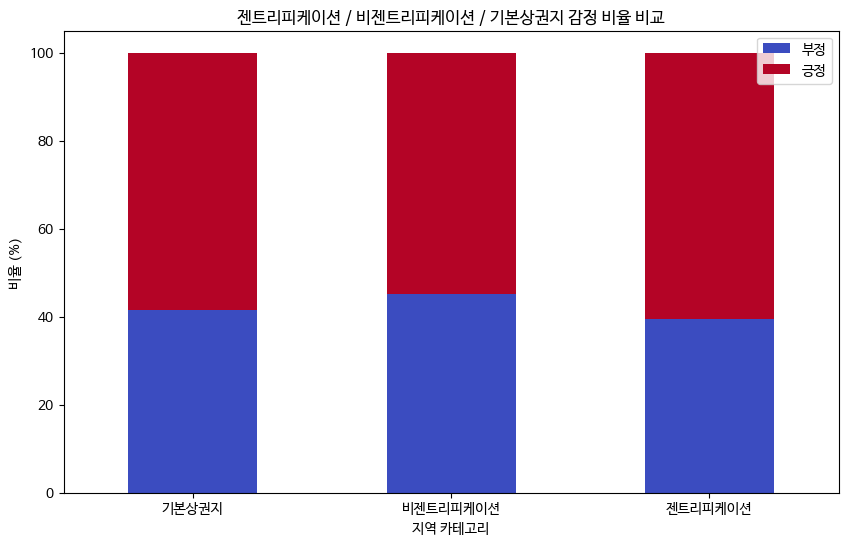

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sentiment_ratio.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ Í∞êÏ†ï ÎπÑÏú® ÎπÑÍµê")
plt.xlabel("ÏßÄÏó≠ Ïπ¥ÌÖåÍ≥†Î¶¨")
plt.ylabel("ÎπÑÏú® (%)")
plt.xticks(rotation=0)
plt.legend(["Î∂ÄÏ†ï", "Í∏çÏ†ï"])
plt.show()

In [ ]:
# 1~5Ï†êÎ≥Ñ Í∏çÏ†ï(1) / Î∂ÄÏ†ï(0) Í∞úÏàò ÏßëÍ≥Ñ
point_sentiment_counts = df_test.groupby(['point', 'label']).size().unstack(fill_value=0)

# 1~5Ï†êÎ≥Ñ Í∏ç/Î∂ÄÏ†ï ÎπÑÏú® Í≥ÑÏÇ∞
point_sentiment_ratio = point_sentiment_counts.div(point_sentiment_counts.sum(axis=1), axis=0) * 100

point_sentiment_ratio

label          0          1
point                      
1      86.826120  13.173880
2      75.448718  24.551282
3      53.859680  46.140320
4      32.260213  67.739787
5      21.006103  78.993897

# ÌèâÏ†êÎ≥Ñ Í∞êÏ†ï ÎπÑÏú®
ÌèâÏ†êÏù¥ ÎÜíÏùÑÏàòÎ°ù Í∏çÏ†ïÏ†ÅÏù∏ Í∞êÏ†ïÏù¥ Ï¶ùÍ∞ÄÌïòÍ≥†, ÌèâÏ†êÏù¥ ÎÇÆÏùÑÏàòÎ°ù Î∂ÄÏ†ïÏ†ÅÏù∏ Í∞êÏ†ïÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå.

Í∞êÏ†ï Î∂ÑÏÑù ÎùºÎ≤®ÎßÅÏù¥ Ï†ÅÏ†àÌïòÍ≤å Ïù¥Î£®Ïñ¥Ï°åÏùåÏùÑ Í≤ÄÏ¶ùÌï®

<Figure size 800x500 with 0 Axes>

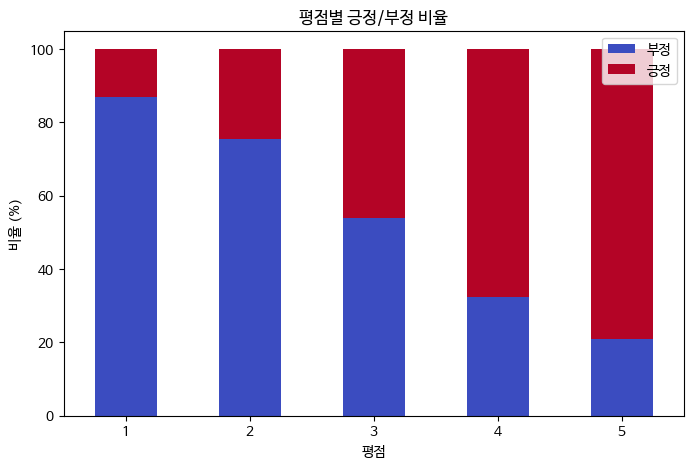

In [ ]:
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
point_sentiment_ratio.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(8,5))
plt.title("ÌèâÏ†êÎ≥Ñ Í∏çÏ†ï/Î∂ÄÏ†ï ÎπÑÏú®")
plt.xlabel("ÌèâÏ†ê")
plt.ylabel("ÎπÑÏú® (%)")
plt.xticks(rotation=0)
plt.legend(["Î∂ÄÏ†ï", "Í∏çÏ†ï"])  # 0: Î∂ÄÏ†ï, 1: Í∏çÏ†ï
plt.show()

# ÌèâÏ†ê(1~5)Î≥Ñ Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄÏóê ÎåÄÌïú Í∏çÏ†ï/Î∂ÄÏ†ï ÎπÑÏú® ÎπÑÍµê

Ï††Ìä∏Î¶¨ ÏßÄÏó≠Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∏çÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ ÎπÑÏú®Ïù¥ Îçî ÎÜíÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥ÏûÑ.
ÏÉÅÍ∂å ÌäπÏÑ± Ï∞®Ïù¥Î°ú Ìï¥ÏÑùÎê† Ïàò ÏûàÏùå.

In [ ]:
all_points = [1, 2, 3, 4, 5]
all_categories = ["Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò", "ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò", "Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ"]

# Î™®Îì† Ï°∞Ìï©ÏùÑ Ìè¨Ìï®ÌïòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ±
multi_index = pd.MultiIndex.from_product([all_categories, all_points], names=['category', 'point'])
sentiment_counts = df_test.groupby(['category', 'point', 'label']).size().unstack(fill_value=0).reindex(multi_index, fill_value=0)

# ÎπÑÏú® Í≥ÑÏÇ∞
sentiment_ratio = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

sentiment_ratio

label                   0          1
category point                      
Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò  1      86.483954  13.516046
         2      74.883991  25.116009
         3      52.053973  47.946027
         4      30.818080  69.181920
         5      19.220697  80.779303
ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò 1      86.720067  13.279933
         2      75.641026  24.358974
         3      56.153370  43.846630
         4      34.137214  65.862786
         5      23.791418  76.208582
Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ    1      88.183981  11.816019
         2      77.173913  22.826087
         3      57.006803  42.993197
         4      34.827862  65.172138
         5      22.716346  77.283654

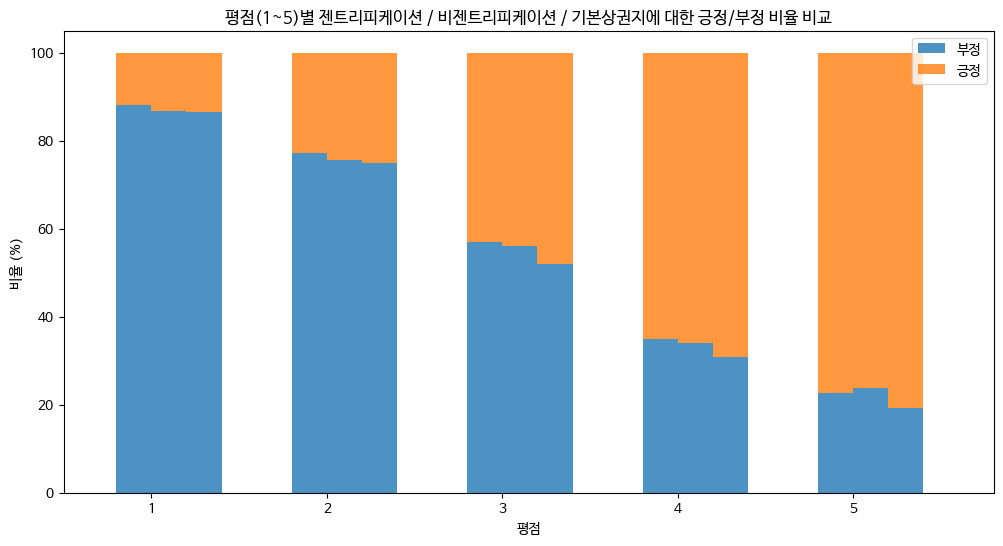

In [ ]:
# XÏ∂ïÏùò ÏúÑÏπò Ï°∞Ï†ï
points = sorted(sentiment_ratio.index.get_level_values('point').unique())  # ÌèâÏ†ê(1~5)
x = np.arange(len(points))
width = 0.2

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax = plt.subplots(figsize=(12, 6))
colors = ["#1f77b4", "#ff7f0e"]

# Í∞ôÏùÄ ÌèâÏ†ê ÎÇ¥ÏóêÏÑú ÏßÄÏó≠Î≥ÑÎ°ú ÎÇòÎûÄÌûà Î∞∞Ïπò
for idx, category in enumerate(["Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò", "ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò", "Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ"]):
    category_data = sentiment_ratio.xs(category, level='category')

    category_data = category_data.reindex(points, fill_value=0)

    # Í∞Å ÌèâÏ†êÏóêÏÑú 3Í∞úÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä Î≥¥Ïù¥ÎèÑÎ°ù ÏÑ§Ï†ï
    category_data.plot(
        kind='bar', stacked=True, color=colors, alpha=0.8, width=width, position=idx-1, ax=ax, label=category
    )

# XÏ∂ïÏùÑ ÌèâÏ†ê(1~5)Î°ú ÏÑ§Ï†ï
ax.set_xticks(x)
ax.set_xticklabels(points, rotation=0)

plt.title("ÌèâÏ†ê(1~5)Î≥Ñ Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò / Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄÏóê ÎåÄÌïú Í∏çÏ†ï/Î∂ÄÏ†ï ÎπÑÏú® ÎπÑÍµê")
plt.xlabel("ÌèâÏ†ê")
plt.ylabel("ÎπÑÏú® (%)")
plt.legend(["Î∂ÄÏ†ï", "Í∏çÏ†ï"])

ax.set_xlim(-0.5, len(points) - 0.2)

plt.show()

# Í∞Å ÏßÄÏó≠Î≥ÑÎ°ú Í∞ÅÍ∞Å ÌÜ†ÌîΩ Î™®Îç∏ÎßÅÏùÑ Ìï¥ÏÑú ÏûêÏ£º ÎÇòÏò§Îäî Îã®Ïñ¥Î•º ÏïåÏïÑÎ≥∏Îã§Î©¥???

In [ ]:
df_gentrified = df_test[df_test['category'] == 'Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò']
df_non_gentrified = df_test[df_test['category'] == 'ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò']
df_baseline = df_test[df_test['category'] == 'Í∏∞Î≥∏ÏÉÅÍ∂åÏßÄ']

In [ ]:
df_gentrified.to_csv("gentrified_reviews.csv", encoding='utf-8-sig', index=False)
df_non_gentrified.to_csv("non_gentrified_reviews.csv", encoding='utf-8-sig', index=False)
df_baseline.to_csv("baseline_reviews.csv", encoding='utf-8-sig', index=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from konlpy.tag import Okt
import re

In [ ]:
# ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
okt = Okt()

# ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_text(text):
    text = re.sub("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]", "", text)  # ÌïúÍ∏ÄÍ≥º Í≥µÎ∞±Îßå ÎÇ®ÍπÄ
    tokens = okt.nouns(text)  # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú
    return " ".join(tokens)

In [ ]:
# Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
df_non_gentrified['processed'] = df_non_gentrified['contents'].astype(str).apply(preprocess_text)

df_gentrified['processed'] = df_gentrified['contents'].astype(str).apply(preprocess_text)

df_baseline['processed'] = df_baseline['contents'].astype(str).apply(preprocess_text)

<ipython-input-28-ba1b22d4699b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_gentrified['processed'] = df_non_gentrified['contents'].astype(str).apply(preprocess_text)
<ipython-input-28-ba1b22d4699b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gentrified['processed'] = df_gentrified['contents'].astype(str).apply(preprocess_text)
<ipython-input-28-ba1b22d4699b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
# Îã®Ïñ¥ ÎπàÎèÑ Î≤°ÌÑ∞Ìôî (CountVectorizer ÏÇ¨Ïö©)
vectorizer = CountVectorizer(max_features=3000)  # ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ ÌôïÏù∏
X = vectorizer.fit_transform(df_non_gentrified['processed'])

vectorizer = CountVectorizer(max_features=3000)  # ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ ÌôïÏù∏
Y = vectorizer.fit_transform(df_gentrified['processed'])

vectorizer = CountVectorizer(max_features=3000)  # ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ ÌôïÏù∏
Z = vectorizer.fit_transform(df_baseline['processed'])

In [ ]:
# Îã®Ïñ¥Î≥Ñ Îì±Ïû• ÌöüÏàò Ï†ïÎ†¨
word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
word_counts = word_counts.sort_values(by='count', ascending=False)

word_counts_non = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': Y.toarray().sum(axis=0)})
word_counts_non = word_counts.sort_values(by='count', ascending=False)

word_counts_non = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': Z.toarray().sum(axis=0)})
word_counts_non = word_counts.sort_values(by='count', ascending=False)

In [ ]:
# ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
word_counts

word  count
1      Í∞ÄÍ≤å   1264
2398   ÏßÄÏù∏   1173
1303   ÏÇ¨Ïã§   1172
2413   ÏßÑÎìù    992
1085   Î∞∞Ïπò    985
...   ...    ...
328    Í∏àÏï°      4
331    Í∏àÏ≤ú      4
2078   Ïù∏Î†•      4
148    Í≤ΩÏÇ¨      4
2080   Ïù∏ÏÇ¨      4

[3000 rows x 2 columns]

# Ï††Ìä∏Î¶¨ / ÎπÑÏ††Ìä∏Î¶¨ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú
| ÎπÑÍµê Ìï≠Î™©       | Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò            | ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò         |
|---------------|---------------------|---------------------|
| **Ï£ºÏöî ÌèâÍ∞Ä ÏöîÏÜå** | Îßõ, Î∂ÑÏúÑÍ∏∞, Ïõ®Ïù¥ÌåÖ, Í∞ÄÍ≤©  | Îßõ, ÏÑúÎπÑÏä§(Î∂àÏπúÏ†à), Îß§Ïû• ÌôòÍ≤Ω |
| **ÌäπÏßïÏ†ÅÏù∏ Îã®Ïñ¥** | Ïõ®Ïù¥ÌåÖ, ÏûêÎ¶¨, Ï∂îÏ≤ú, Ïπ¥Ìéò  | Îß§Ïû•, Ï£ºÎ¨∏, Î∂àÏπúÏ†à, ÏµúÍ≥†  |
| **Í∏çÏ†ïÏ†ÅÏù∏ ÏöîÏÜå** | Î∂ÑÏúÑÍ∏∞, Ï∂îÏ≤ú, Ïπ¥Ìéò Í∞êÏÑ±   | ÏµúÍ≥†, Î∂ÑÏúÑÍ∏∞           |
| **Î∂ÄÏ†ïÏ†ÅÏù∏ ÏöîÏÜå** | Í∞ÄÍ≤© (ÎπÑÏã∏Îã§Îäî ÏùòÎØ∏Í∞ÄÌãà) | Î∂àÏπúÏ†à, ÏÑúÎπÑÏä§ Í¥ÄÎ†® Î∂àÎßå  |




- Ï††Ìä∏Î¶¨ ÏßÄÏó≠ÏùÄ Î∂ÑÏúÑÍ∏∞/Ïõ®Ïù¥ÌåÖ/Í∞ÄÍ≤©Ïóê ÎåÄÌïú Ïñ∏Í∏âÏù¥ ÎßéÏïÑ, Ìä∏Î†åÎîîÌïòÍ≥† Ïù∏Í∏∞ ÏûàÎäî ÏßÄÏó≠ ÌäπÏÑ±Ïù¥ Î∞òÏòÅÎê®
- ÎπÑÏ††Ìä∏Î¶¨ ÏßÄÏó≠ÏùÄ ÎßõÍ≥º ÏÑúÎπÑÏä§(Î∂àÏπúÏ†à)Ïóê ÎåÄÌïú Ïñ∏Í∏âÏù¥ ÎßéÏïÑ, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ïö¥ÏòÅ Î∞©ÏãùÏù¥ÎÇò ÏπúÏ†àÎèÑÍ∞Ä Ï§ëÏöîÌïú ÌèâÍ∞Ä ÏöîÏÜåÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÏùå

In [ ]:
# Î™®Îì† Î¶¨Î∑∞Î•º ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Ìï©ÏπòÍ∏∞
all_reviews_text = " ".join(df_gentrified['processed'])

In [ ]:
from wordcloud import WordCloud
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    background_color="white",
    width=800,
    height=800,
    max_words=200
)

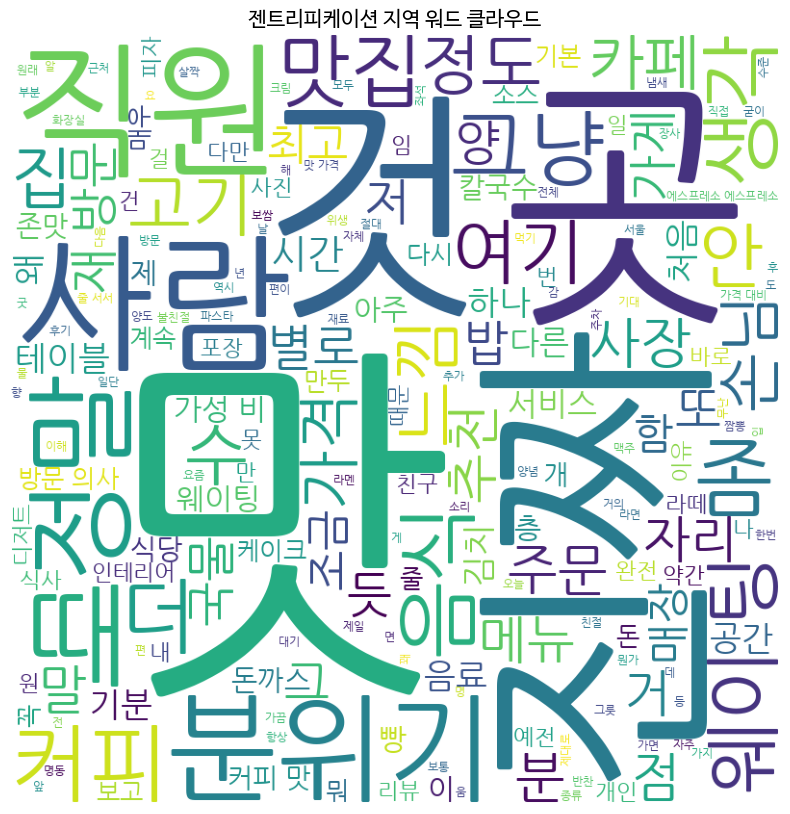

In [ ]:
# Îã®Ïñ¥ Í∏∞Î∞òÏúºÎ°ú ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
all_reviews_wc = wc.generate(all_reviews_text)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_reviews_wc)
plt.title("Ï††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú", fontsize=15)
plt.show()

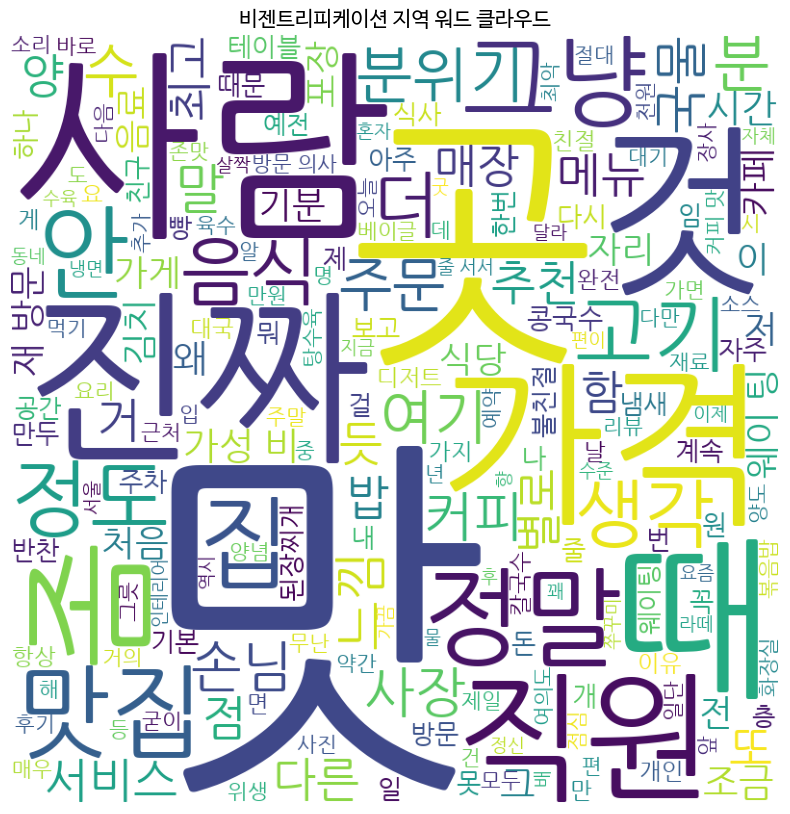

In [ ]:
# Î™®Îì† Î¶¨Î∑∞Î•º ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Ìï©ÏπòÍ∏∞
all_reviews_text2 = " ".join(df_non_gentrified['processed'])

all_reviews_wc2 = wc.generate(all_reviews_text2)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(all_reviews_wc2)
plt.title("ÎπÑÏ††Ìä∏Î¶¨ÌîºÏºÄÏù¥ÏÖò ÏßÄÏó≠ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú", fontsize=15)
plt.show()

In [ ]:
# Ï∞®ÏßëÌï© Íµ¨ÌïòÍ∏∞
gentrified_unique_words = df_gentrified['processed'] - df_non_gentrified['processed']  # Ï††Ìä∏Î¶¨ - ÎπÑÏ††Ìä∏Î¶¨
non_gentrified_unique_words = df_non_gentrified['processed'] - df_gentrified['processed']  # ÎπÑÏ††Ìä∏Î¶¨ - Ï††Ìä∏Î¶¨

gentrified_unique_df = pd.DataFrame({'Ï††Ìä∏Î¶¨ Ï†ÑÏö© Îã®Ïñ¥': list(gentrified_unique_words)})
non_gentrified_unique_df = pd.DataFrame({'ÎπÑÏ††Ìä∏Î¶¨ Ï†ÑÏö© Îã®Ïñ¥': list(non_gentrified_unique_words)})

gentrified_unique_df

Ï††Ìä∏Î¶¨ Ï†ÑÏö© Îã®Ïñ¥
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
40131        NaN
40132        NaN
40133        NaN
40134        NaN
40135        NaN

[40136 rows x 1 columns]